In [1]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import math
from numpy.polynomial.polynomial import Polynomial
import random
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange

This code generates a set of random points and performs polynomial interpolation using Lagrange polynomials. The original (x, y) data pairs are truncated to different decimal precisions (2, 4, 6, and 8 decimal places) to observe how the precision affects the resulting polynomial and its evaluation at random points. After generating the truncated lists, the polynomials are evaluated and the error is computed between the original and truncated polynomials. Finally, the norm of the errors is calculated to measure the impact of truncation.

In [2]:
# Function to truncate a list of floats to a given number of decimal places
def truncated_lists(arr1, arr2, dec_places):
    for i in range(n):
        arr2.append(round(arr1[i], dec_places))
    return arr2

n = 30
rand_range_low = -3
rand_range_high = 3

# Arrays to store original and truncated values for x and y
x, x_trunc_2, x_trunc_4, x_trunc_6, x_trunc_8 = [], [], [], [], []
y, y_trunc_2, y_trunc_4, y_trunc_6, y_trunc_8 = [], [], [], [], []

# Generate 'n' random (x, y) pairs with 16 decimal points precision
for i in range(n):
    x.append(random.SystemRandom().uniform(rand_range_low, rand_range_high))
    y.append(random.SystemRandom().uniform(rand_range_low, rand_range_high))

# Generate truncated lists for x and y at different precision levels (2, 4, 6, 8 decimal places)
truncated_lists(x, x_trunc_2, 2)
truncated_lists(y, y_trunc_2, 2)

truncated_lists(x, x_trunc_4, 4)
truncated_lists(y, y_trunc_4, 4)

truncated_lists(x, x_trunc_6, 6)
truncated_lists(y, y_trunc_6, 6)

truncated_lists(x, x_trunc_8, 8)
truncated_lists(y, y_trunc_8, 8)

# Perform polynomial interpolation using Lagrange method on the original and truncated data
poly = lagrange(x, y)
poly_trunc_8 = lagrange(x_trunc_8, y_trunc_8)
poly_trunc_6 = lagrange(x_trunc_6, y_trunc_6)
poly_trunc_4 = lagrange(x_trunc_4, y_trunc_4)
poly_trunc_2 = lagrange(x_trunc_2, y_trunc_2)

# Get the coefficients of the interpolated polynomials
Polynomial(poly.coef[::-1]).coef
Polynomial(poly_trunc_8.coef[::-1]).coef
Polynomial(poly_trunc_4.coef[::-1]).coef
Polynomial(poly_trunc_2.coef[::-1]).coef

# Check for NaN coefficients (occurs when there are zeros in the truncated data)
if (np.isnan(Polynomial(poly_trunc_2.coef[1]).coef) == 1):
    print("lala")

'''
NaN values often occur in the case of 2 decimal precision
because of the higher chance of getting 0.00 in the truncated values.
'''

# Print polynomial evaluations at x = 1 and x = -1
print(poly(1), poly(-1))
print(poly_trunc_8(1), poly_trunc_8(-1))
print(poly_trunc_6(1), poly_trunc_6(-1))
print(poly_trunc_4(1), poly_trunc_4(-1))
print(poly_trunc_2(1), poly_trunc_2(-1))

# Generate random x values in the range (low2, high2) for evaluation
num_pts = 30
low2 = -3
high2 = 3
mu = 0
sigma = 0.0

x_rand = []
for i in range(num_pts):
    x_rand.append(random.SystemRandom().uniform(low2, high2))

# Evaluate the original polynomial at the random points
y_for_x_rand = []
for i in range(num_pts):
    y_for_x_rand.append(poly(x_rand[i]) + np.random.normal(mu, sigma))

# Truncate the polynomial evaluation results to different precisions
trunc_8 = []
trunc_6 = []
trunc_4 = []
trunc_2 = []

truncated_lists(y_for_x_rand, trunc_8, 8)
truncated_lists(y_for_x_rand, trunc_6, 6)
truncated_lists(y_for_x_rand, trunc_4, 4)
truncated_lists(y_for_x_rand, trunc_2, 2)

# Perform polynomial interpolation on the new truncated values
new_poly = lagrange(x_rand, y_for_x_rand)
new_poly_8 = lagrange(x_rand, trunc_8)
new_poly_6 = lagrange(x_rand, trunc_6)
new_poly_4 = lagrange(x_rand, trunc_4)
new_poly_2 = lagrange(x_rand, trunc_2)

# Compute the error between the original and the new polynomials
err = [poly(1) - new_poly(1), poly(-1) - new_poly(-1)]
print(np.linalg.norm(err))

err8 = [poly_trunc_8(1) - new_poly_8(1), poly_trunc_8(-1) - new_poly_8(-1)]
print(np.linalg.norm(err8))

err6 = [poly_trunc_6(1) - new_poly_6(1), poly_trunc_6(-1) - new_poly_6(-1)]
print(np.linalg.norm(err6))

err4 = [poly_trunc_4(1) - new_poly_4(1), poly_trunc_4(-1) - new_poly_4(-1)]
print(np.linalg.norm(err4))

err2 = [poly_trunc_2(1) - new_poly_2(1), poly_trunc_2(-1) - new_poly_2(-1)]
print(np.linalg.norm(err2))

63.8271382654857 1087177.7893678306
63.82735038366809 1087179.5822952585
63.831772285790066 1087222.3903566953
64.53326519730763 1094026.5344483575
17.354194261992234 675506.2541351634
1.8224297425127547
2.5757040377644564
44.62380880015031
6848.801585599397
411671.5822601467


This part of the code reads data from a file named lagrange.txt, which contains the degrees of Lagrange polynomials and the corresponding errors. It computes the mean errors for different polynomial precisions (2, 4, 6, 8, and full precision) across multiple trials and plots them on a semi-logarithmic scale. For each degree of polynomial, the errors are plotted with a unique label indicating the degree of the polynomial (e.g., 20, 25, etc.).

[[21775.288105153202], [1261.4390675226596], [36.81608831027176], [0.7572163919036137], [0.12303506384465702]]
[[2128185.76967595], [23468.70850240321], [510.5781017144658], [152.92113197336224], [149.24601661867695]]
[[24846971.042687967], [604796.9043148543], [5042.723582797881], [516.8411437463783], [451.4351006433486]]
[[39565443.07852844], [773133.8779363475], [297664.41381708864], [281626.4428932882], [281604.712135322]]
[[2144476985.2147949], [151223315.59738272], [140580244.59339276], [140617006.19458836], [140619634.77803952]]


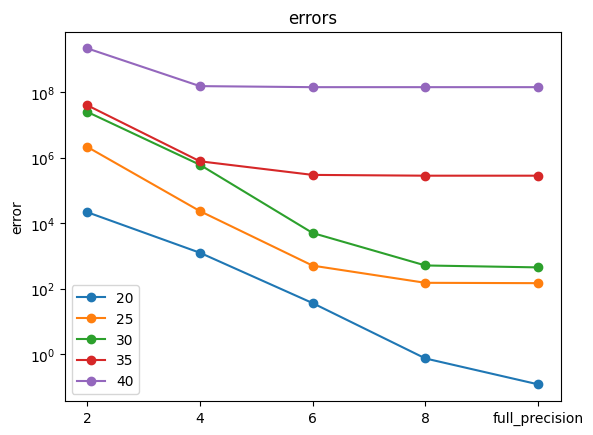

In [3]:
file = open('lagrange.txt', 'r')

degrees = file.readline().split()
num_plots = len(degrees)

for i in range(num_plots):
    degrees[i] = int(degrees[i])

# 5 errors: full precision, 8, 4, 6, 2
num_err = file.readline()
num_trials = file.readline()

def get_mean(arr):
    for i in range(int(num_err)):
        x1 = file.readline()
        x1 = eval(x1)
        x1 = np.array(x1)
        arr.append(mean(x1))
        return (mean(x1))

for i in range(num_plots):
    tmp20, tmp25, tmp30, tmp35, tmp40 = [], [], [], [], []

    get_mean(tmp20)
    get_mean(tmp25)
    get_mean(tmp30)
    get_mean(tmp35)
    get_mean(tmp40)

    #print(tmp20, tmp25, tmp30, tmp35, tmp40)

    obj = ('2', '4', '6', '8', 'full_precision')
    errs = [tmp20, tmp25, tmp30, tmp35, tmp40]
    print(errs)
    y_pos = np.arange(len(obj))

    if (i==0):
        q = 20
        plt.semilogy(y_pos, errs, label=q, marker="o")
        plt.xticks(y_pos, obj)

    elif (i==1):
        q = 25
        plt.semilogy(y_pos, errs, label=q, marker="o")
        plt.xticks(y_pos, obj)


    elif (i==2):
        q = 30
        plt.semilogy(y_pos, errs, label=q, marker="o")
        plt.xticks(y_pos, obj)

    elif (i==3):
        q = 35
        plt.semilogy(y_pos, errs, label=q, marker="o")
        plt.xticks(y_pos, obj)

    elif (i==4):
        q = 40
        plt.semilogy(y_pos, errs, label=q, marker="o")
        plt.xticks(y_pos, obj)


plt.legend()
plt.ylabel('error')
plt.title('errors')
plt.show()